In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Run parse_PET_file.py 

### Start ML process to reduce number of Monthly Factors that affect Crude Oil Prices
#### Data Exploration notebook shows 54267 Monthly factors

In [3]:
monthly_crude = pd.read_csv('./monthly_crude_data.csv',index_col='index')
monthly_crude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1920-01-31 to 2017-04-30
Columns: 54267 entries, PET.RCLC3.M to PET.EMA_EPM0X_PRA_SMI_DPG.M
dtypes: float64(54267)
memory usage: 483.6+ MB


### Lets look at the Monthly Data

In [6]:
monthly_1980 = monthly_crude[-376:]
monthly_1980

,PET.RCLC3.M,PET.EER_EPLLPA_PF4_Y44MB_DPG.M,PET.EER_EPMRR_PE2_Y35NY_DPG.M,PET.RCLC4.M,PET.EER_EPD2DC_PF4_Y05LA_DPG.M,PET.EER_EPJK_PF4_RGC_DPG.M,PET.EER_EPD2F_PE4_Y35NY_DPG.M,PET.RCLC1.M,PET.EER_EPMRR_PE3_Y35NY_DPG.M,PET.EER_EPD2DXL0_PF4_RGC_DPG.M,...,PET.EMA_EPMMX_PWA_SIA_DPG.M,PET.EMA_EPMMX_PWA_SNH_DPG.M,PET.EMA_EPM0X_PRA_SOK_DPG.M,PET.EMA_EPMPX_PBS_SAK_DPG.M,PET.EMA_EPMPX_PTA_SGA_DPG.M,PET.EMA_EPMPX_PTA_SID_DPG.M,PET.EMA_EPMPX_PTC_SAL_DPG.M,PET.EMA_EPMMX_PTC_SME_DPG.M,PET.EMA_EPM0X_PRA_SKY_DPG.M,PET.EMA_EPM0X_PRA_SMI_DPG.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,21.94,NaN,NaN,21.66,NaN,NaN,NaN,22.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-28,15.83,NaN,NaN,15.94,NaN,NaN,NaN,15.46,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-31,13.12,NaN,NaN,13.28,NaN,NaN,NaN,12.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-30,12.57,NaN,NaN,12.62,NaN,NaN,NaN,12.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-31,14.44,NaN,NaN,14.29,NaN,NaN,NaN,15.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-06-30,13.01,NaN,NaN,13.04,NaN,NaN,NaN,13.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-07-31,11.35,NaN,NaN,11.49,NaN,NaN,NaN,11.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-08-31,14.96,NaN,NaN,14.94,NaN,NaN,NaN,15.11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-09-30,15.02,NaN,NaN,14.91,NaN,NaN,NaN,14.94,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's make sure that the Price data is available

In [18]:
df = monthly_crude[['PET.RCLC1.M','PET.RCLC2.M','PET.RCLC3.M','PET.RCLC4.M','PET.RWTC.M']][-376:]
df

,PET.RCLC1.M,PET.RCLC2.M,PET.RCLC3.M,PET.RCLC4.M,PET.RWTC.M
index,,,,,
1986-01-31,22.98,22.37,21.94,21.66,22.93
1986-02-28,15.46,15.71,15.83,15.94,15.46
1986-03-31,12.62,12.95,13.12,13.28,12.61
1986-04-30,12.75,12.62,12.57,12.62,12.84
1986-05-31,15.26,14.76,14.44,14.29,15.38
1986-06-30,13.38,13.04,13.01,13.04,13.43
1986-07-31,11.58,11.30,11.35,11.49,11.59
1986-08-31,15.11,14.99,14.96,14.94,15.10
1986-09-30,14.94,15.05,15.02,14.91,14.87


In [19]:
df.corr()

,PET.RCLC1.M,PET.RCLC2.M,PET.RCLC3.M,PET.RCLC4.M,PET.RWTC.M
PET.RCLC1.M,1.000000,0.999702,0.999069,0.998287,0.999984
PET.RCLC2.M,0.999702,1.000000,0.999813,0.999374,0.999596
PET.RCLC3.M,0.999069,0.999813,1.000000,0.999868,0.998895
PET.RCLC4.M,0.998287,0.999374,0.999868,1.000000,0.998061
PET.RWTC.M,0.999984,0.999596,0.998895,0.998061,1.000000


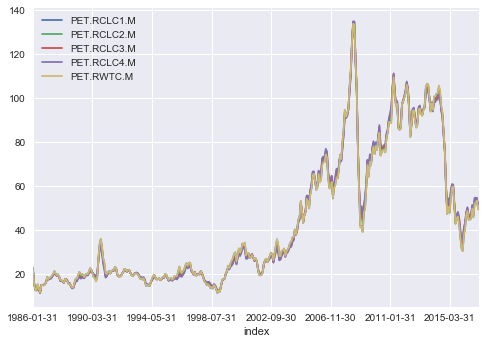

In [12]:
df.plot()
plt.show()

### 'PET.RWTC.M' Will be the y value in our models

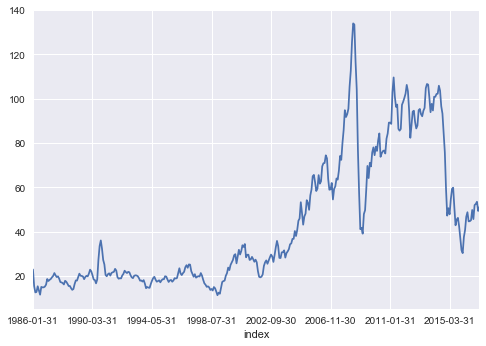

In [26]:
monthly_crude['PET.RWTC.M'][-376:].plot()

In [27]:
monthly_1980_1 = monthly_1980[monthly_1980.columns[monthly_1980.count() > 342]]
monthly_1980_1.count()

PET.RCLC3.M                      376
PET.RCLC4.M                      376
PET.RCLC1.M                      376
PET.EER_EPD2F_PE1_Y35NY_DPG.M    376
PET.EER_EPD2F_PF4_Y35NY_DPG.M    371
PET.EER_EPD2F_PE3_Y35NY_DPG.M    376
PET.RWTC.M                       376
PET.EER_EPMRU_PF4_RGC_DPG.M      371
PET.EER_EPMRU_PF4_Y35NY_DPG.M    371
PET.RCLC2.M                      376
PET.RBRTE.M                      360
PET.MPPEXUS2.M                   373
PET.MGFRPP41.M                   374
PET.MOCLE2A2.M                   374
PET.MGFMXP2P31.M                 374
PET.MNSUPUS2.M                   374
PET.MBNUPP52.M                   374
PET.MTTUPP22.M                   374
PET.MWXEXP12.M                   374
PET.MOPUE3C2.M                   374
PET.MBNRPP42.M                   372
PET.MDIMRP51.M                   374
PET.MDISCP31.M                   374
PET.MNGSCP52.M                   374
PET.MGARPP22.M                   373
PET.MOHUA_NUS_2.M                374
PET.MPRFPUS1.M                   374
P

In [28]:
X = monthly_1980_1.values
print(X.dtype)
print(np.shape(X))
X

float64
(376, 3821)


array([[   21.94,    21.66,    22.98, ...,      nan,  1340.  ,    43.  ],
       [   15.83,    15.94,    15.46, ...,      nan,   965.  ,    34.  ],
       [   13.12,    13.28,    12.62, ...,      nan,  1024.  ,    33.  ],
       ..., 
       [   54.32,    54.64,    53.46, ...,      nan,      nan,      nan],
       [   50.61,    50.91,    49.67, ...,      nan,      nan,      nan],
       [   51.84,    52.09,    51.12, ...,      nan,      nan,      nan]])

In [29]:
y = monthly_crude['PET.RWTC.M'][-376:].values
print(y.dtype)
print(np.shape(y))
y

float64
(376,)


array([  22.93,   15.46,   12.61,   12.84,   15.38,   13.43,   11.59,
         15.1 ,   14.87,   14.9 ,   15.22,   16.11,   18.65,   17.75,
         18.3 ,   18.68,   19.44,   20.07,   21.34,   20.31,   19.53,
         19.86,   18.85,   17.28,   17.13,   16.8 ,   16.2 ,   17.86,
         17.42,   16.53,   15.5 ,   15.52,   14.54,   13.77,   14.14,
         16.38,   18.02,   17.94,   19.48,   21.07,   20.12,   20.05,
         19.78,   18.58,   19.59,   20.1 ,   19.86,   21.1 ,   22.86,
         22.11,   20.39,   18.43,   18.2 ,   16.7 ,   18.45,   27.31,
         33.51,   36.04,   32.33,   27.28,   25.23,   20.48,   19.9 ,
         20.83,   21.23,   20.19,   21.4 ,   21.69,   21.89,   23.23,
         22.46,   19.5 ,   18.79,   19.01,   18.92,   20.23,   20.98,
         22.39,   21.78,   21.34,   21.88,   21.69,   20.34,   19.41,
         19.03,   20.09,   20.32,   20.25,   19.95,   19.09,   17.89,
         18.01,   17.5 ,   18.15,   16.61,   14.52,   15.03,   14.78,
         14.68,   16

In [30]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 
selector.ranking_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Lets cut down the number of columns to run some tests 
### Replace NaN with 0

In [37]:
monthly_1980_1000 = monthly_1980_1[monthly_1980_1.columns[:1000]]
monthly_1980_1000.fillna(0,inplace=True)
monthly_1980_1000.describe()

/Users/Prometheus/Code/Chipy_Mentorship/venv3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,PET.RCLC3.M,PET.RCLC4.M,PET.RCLC1.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.RWTC.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RCLC2.M,...,PET.MCKRPP32.M,PET.MCKRPP41.M,PET.MCKRPP51.M,PET.MCKRPUS1.M,PET.MKESCP42.M,PET.MLUSCP21.M,PET.MUONRP32.M,PET.MNSRPP12.M,PET.MNSRPUS2.M,PET.MRERPP12.M
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,43.169681,43.192048,42.987021,1.248056,1.228152,1.254311,42.971277,1.193290,1.220737,43.105186,...,374.561170,521.380319,4519.771277,22039.920213,0.00000,-3.367021,-3.962766,1.747340,48.994681,108.119681
std,30.333509,30.438012,30.008159,0.908158,0.901313,0.914144,29.980021,0.830642,0.847382,30.191526,...,104.005854,166.966876,538.063561,4262.877495,0.84538,124.552975,16.847352,1.662927,13.173913,35.992726
min,11.350000,11.490000,11.310000,0.312000,0.000000,0.323000,11.350000,0.000000,0.000000,11.300000,...,0.000000,0.000000,0.000000,0.000000,-3.00000,-583.000000,-69.000000,-1.000000,0.000000,0.000000
25%,19.190000,19.017500,19.500000,0.533000,0.530750,0.535500,19.495000,0.535000,0.550250,19.357500,...,273.500000,388.000000,4279.750000,18662.500000,0.00000,-64.000000,-12.000000,1.000000,39.750000,84.500000
50%,27.510000,27.140000,28.355000,0.763500,0.773000,0.747000,28.415000,0.810000,0.808000,28.045000,...,391.000000,511.000000,4599.000000,22485.500000,0.00000,-3.000000,-4.000000,1.000000,49.000000,114.000000
75%,65.412500,66.037500,63.110000,1.842750,1.783750,1.872500,62.882500,1.808750,1.809750,64.555000,...,469.250000,651.750000,4847.750000,25762.000000,0.00000,59.000000,3.000000,2.000000,56.000000,133.000000
max,134.780000,134.890000,134.020000,3.812000,3.801000,3.870000,133.880000,3.284000,3.292000,134.520000,...,539.000000,875.000000,5431.000000,29710.000000,3.00000,671.000000,65.000000,15.000000,108.000000,224.000000


In [38]:
monthly_1980_1000.corr()

,PET.RCLC3.M,PET.RCLC4.M,PET.RCLC1.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.RWTC.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RCLC2.M,...,PET.MCKRPP32.M,PET.MCKRPP41.M,PET.MCKRPP51.M,PET.MCKRPUS1.M,PET.MKESCP42.M,PET.MLUSCP21.M,PET.MUONRP32.M,PET.MNSRPP12.M,PET.MNSRPUS2.M,PET.MRERPP12.M
PET.RCLC3.M,1.000000,0.999868,0.999069,0.991508,0.989699,0.992921,0.998895,0.985256,0.984870,0.999813,...,0.711806,0.730200,0.163395,0.639102,-0.009541,0.004009,0.246098,-0.370426,-0.552546,-0.587150
PET.RCLC4.M,0.999868,1.000000,0.998287,0.991297,0.989326,0.993034,0.998061,0.985104,0.984678,0.999374,...,0.713682,0.733686,0.162649,0.640625,-0.010029,0.003863,0.242139,-0.371957,-0.557186,-0.589710
PET.RCLC1.M,0.999069,0.998287,1.000000,0.991213,0.989807,0.991770,0.999984,0.984742,0.984478,0.999702,...,0.704201,0.720376,0.163952,0.632726,-0.007748,0.005263,0.255405,-0.364867,-0.540334,-0.580136
PET.EER_EPD2F_PE1_Y35NY_DPG.M,0.991508,0.991297,0.991213,1.000000,0.997110,0.999156,0.991067,0.986221,0.989022,0.991535,...,0.705068,0.733886,0.147968,0.633285,-0.010590,0.008365,0.283496,-0.367476,-0.549572,-0.613480
PET.EER_EPD2F_PF4_Y35NY_DPG.M,0.989699,0.989326,0.989807,0.997110,1.000000,0.995985,0.989674,0.988111,0.990459,0.989906,...,0.701382,0.729903,0.156318,0.631424,-0.011150,-0.000014,0.292794,-0.354529,-0.539216,-0.600169
PET.EER_EPD2F_PE3_Y35NY_DPG.M,0.992921,0.993034,0.991770,0.999156,0.995985,1.000000,0.991567,0.987406,0.989917,0.992557,...,0.708277,0.737773,0.153099,0.636853,-0.010866,0.009234,0.275631,-0.367088,-0.554661,-0.615775
PET.RWTC.M,0.998895,0.998061,0.999984,0.991067,0.989674,0.991567,1.000000,0.984635,0.984352,0.999596,...,0.703737,0.719726,0.164473,0.632502,-0.007659,0.005303,0.256193,-0.364383,-0.539223,-0.579327
PET.EER_EPMRU_PF4_RGC_DPG.M,0.985256,0.985104,0.984742,0.986221,0.988111,0.987406,0.984635,1.000000,0.998064,0.985175,...,0.712509,0.724438,0.165603,0.642330,-0.008947,-0.005736,0.279514,-0.344651,-0.548278,-0.617441
PET.EER_EPMRU_PF4_Y35NY_DPG.M,0.984870,0.984678,0.984478,0.989022,0.990459,0.989917,0.984352,0.998064,1.000000,0.984851,...,0.719579,0.731277,0.163800,0.648787,-0.009195,-0.002779,0.302288,-0.344921,-0.544185,-0.628476
PET.RCLC2.M,0.999813,0.999374,0.999702,0.991535,0.989906,0.992557,0.999596,0.985175,0.984851,1.000000,...,0.708886,0.725859,0.163942,0.636700,-0.008837,0.004460,0.250563,-0.368213,-0.546970,-0.583996


In [39]:
monthly_1980_1000[monthly_1980_1000.corr() > .991]

,PET.RCLC3.M,PET.RCLC4.M,PET.RCLC1.M,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.RWTC.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RCLC2.M,...,PET.MCKRPP32.M,PET.MCKRPP41.M,PET.MCKRPP51.M,PET.MCKRPUS1.M,PET.MKESCP42.M,PET.MLUSCP21.M,PET.MUONRP32.M,PET.MNSRPP12.M,PET.MNSRPUS2.M,PET.MRERPP12.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
X_1000 = monthly_1980_1000.values
print(X_1000.dtype)
print(np.shape(X_1000))
X_1000

float64
(376, 1000)


array([[  21.94,   21.66,   22.98, ...,   -1.  ,   51.  ,  135.  ],
       [  15.83,   15.94,   15.46, ...,    1.  ,   53.  ,  133.  ],
       [  13.12,   13.28,   12.62, ...,    1.  ,   57.  ,  131.  ],
       ..., 
       [  54.32,   54.64,   53.46, ...,    1.  ,   36.  ,   39.  ],
       [  50.61,   50.91,   49.67, ...,    0.  ,    0.  ,    0.  ],
       [  51.84,   52.09,   51.12, ...,    0.  ,    0.  ,    0.  ]])

In [52]:
y = monthly_crude['PET.RWTC.M'][-376:].values
print(y.dtype)
print(np.shape(y))
y

float64
(376,)


array([  22.93,   15.46,   12.61,   12.84,   15.38,   13.43,   11.59,
         15.1 ,   14.87,   14.9 ,   15.22,   16.11,   18.65,   17.75,
         18.3 ,   18.68,   19.44,   20.07,   21.34,   20.31,   19.53,
         19.86,   18.85,   17.28,   17.13,   16.8 ,   16.2 ,   17.86,
         17.42,   16.53,   15.5 ,   15.52,   14.54,   13.77,   14.14,
         16.38,   18.02,   17.94,   19.48,   21.07,   20.12,   20.05,
         19.78,   18.58,   19.59,   20.1 ,   19.86,   21.1 ,   22.86,
         22.11,   20.39,   18.43,   18.2 ,   16.7 ,   18.45,   27.31,
         33.51,   36.04,   32.33,   27.28,   25.23,   20.48,   19.9 ,
         20.83,   21.23,   20.19,   21.4 ,   21.69,   21.89,   23.23,
         22.46,   19.5 ,   18.79,   19.01,   18.92,   20.23,   20.98,
         22.39,   21.78,   21.34,   21.88,   21.69,   20.34,   19.41,
         19.03,   20.09,   20.32,   20.25,   19.95,   19.09,   17.89,
         18.01,   17.5 ,   18.15,   16.61,   14.52,   15.03,   14.78,
         14.68,   16

In [53]:
from sklearn.feature_selection import VarianceThreshold
# X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(X_1000)

array([[  21.94,   21.66,   22.98, ...,   -1.  ,   51.  ,  135.  ],
       [  15.83,   15.94,   15.46, ...,    1.  ,   53.  ,  133.  ],
       [  13.12,   13.28,   12.62, ...,    1.  ,   57.  ,  131.  ],
       ..., 
       [  54.32,   54.64,   53.46, ...,    1.  ,   36.  ,   39.  ],
       [  50.61,   50.91,   49.67, ...,    0.  ,    0.  ,    0.  ],
       [  51.84,   52.09,   51.12, ...,    0.  ,    0.  ,    0.  ]])

In [54]:
_1 = sel.fit_transform(X_1000)
np.shape(_1)

(376, 993)

### Passing through small acounts of data through works

### Dimentionality Reduction